# Who is more likely to survive the tragedy of Titanic? 
What factored in the survival rate of the passengers on Titanic?

Here, I am going to explore if gender, wealth status, and age played a role in the Titanic as the movie Titanic suggested.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
#General Survival rate by Categories
titanic=pd.read_csv('titanic-data.csv')
titanic_Survived=titanic.groupby(['Survived'])
titanic_Survived.describe().dropna()

C:\Users\Pikatsou8\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  549.000000  549.000000   549.000000  549.000000   
         mean    30.626179   22.117887    0.329690   447.016393    2.531876   
         std     14.172110   31.388207    0.823166   260.640469    0.735805   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  290.000000  342.000000  342.000000   342.000000  342.000000   
         mean    28.343690   48.395408    0.464912   444.368421    1.950292   
         std     14.950952   66.596998    0.771712   252.358840    0.863321   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  549.000000  
         mean     0.553734  
         std      1.288399  
         min      0.000000  
         max      8.000000  
1        count  342.000000  
         mean     0.473684  
         std      0.708688  
         min      0.000000  
         max      4.000000

DATA WRANGLING:
Looking at the dataset, I noticed that there are some missing data from the dataset provided. My way to deal with the missing values is to just drop it. That way, I am able to calculate the data without messing with the original source.For example, the 'Age' column is missing some values, so what I did was that I simply omit that, since '0' means something for age.

More data wrangling below.

In [4]:
# Create Pclass Label Column
titanic['Class'] = titanic.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
titanic.Class.head()

0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Class, dtype: object

In [5]:
# Create Survival Label Column
titanic['Survival'] = titanic.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [6]:
# Create Embarked Labels Column
titanic['Ports'] = titanic.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})
titanic.Ports.head()

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: Ports, dtype: object

The table above summarizes the general surivial rate by different categories.

The table below separates "Survived" into two groups. 0 indicated those who did not survive while 1 indicate those who survived. Now I am going to isolate each data group.

In [7]:
#female vs male in survival rate in different categories
titanic_Survived=titanic.groupby(['Survived','Sex'])
titanic_Survived.describe().dropna()

C:\Users\Pikatsou8\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Age        Fare       Parch  PassengerId  \
Survived Sex                                                             
0        female count   64.000000   81.000000   81.000000    81.000000   
                mean    25.046875   23.024385    1.037037   434.851852   
                std     13.618591   24.821287    1.391442   263.522063   
                min      2.000000    6.750000    0.000000    15.000000   
                max     57.000000  151.550000    6.000000   889.000000   
         male   count  360.000000  468.000000  468.000000   468.000000   
                mean    31.618056   21.960993    0.207265   449.121795   
                std     14.056019   32.409799    0.601382   260.365260   
                min      1.000000    0.000000    0.000000     1.000000   
                max     74.000000  263.000000    5.000000   891.000000   
1        female count  197.000000  233.000000  233.000000   233.000000   
                mean    28.847716   51.938573    0.515021   429.699571   
                std     14.175073   64.102256    0.820527   255.048296   
                min      0.750000    7.225000    0.000000     2.000000   
                max     63.000000  512.329200    5.000000   888.000000   
         male   count   93.000000  109.000000  109.000000   109.000000   
                mean    27.276022   40.821484    0.357798   475.724771   
                std     16.504803   71.355967    0.645826   244.717482   
                min      0.420000    0.000000    0.000000    18.000000   
                max     80.000000  512.329200    2.000000   890.000000   

                           Pclass       SibSp  
Survived Sex                                   
0        female count   81.000000   81.000000  
                mean     2.851852    1.209877  
                std      0.450309    1.814635  
                min      1.000000    0.000000  
                max      3.000000    8.000000  
         male   count  468.000000  468.000000  
                mean     2.476496    0.440171  
                std      0.761411    1.138507  
                min      1.000000    0.000000  
                max      3.000000    8.000000  
1        female count  233.000000  233.000000  
                mean     1.918455    0.515021  
                std      0.834211    0.737533  
                min      1.000000    0.000000  
                max      3.000000    4.000000  
         male   count  109.000000  109.000000  
                mean     2.018349    0.385321  
                std      0.922774    0.636952  
                min      1.000000    0.000000  
                max      3.000000    4.000000

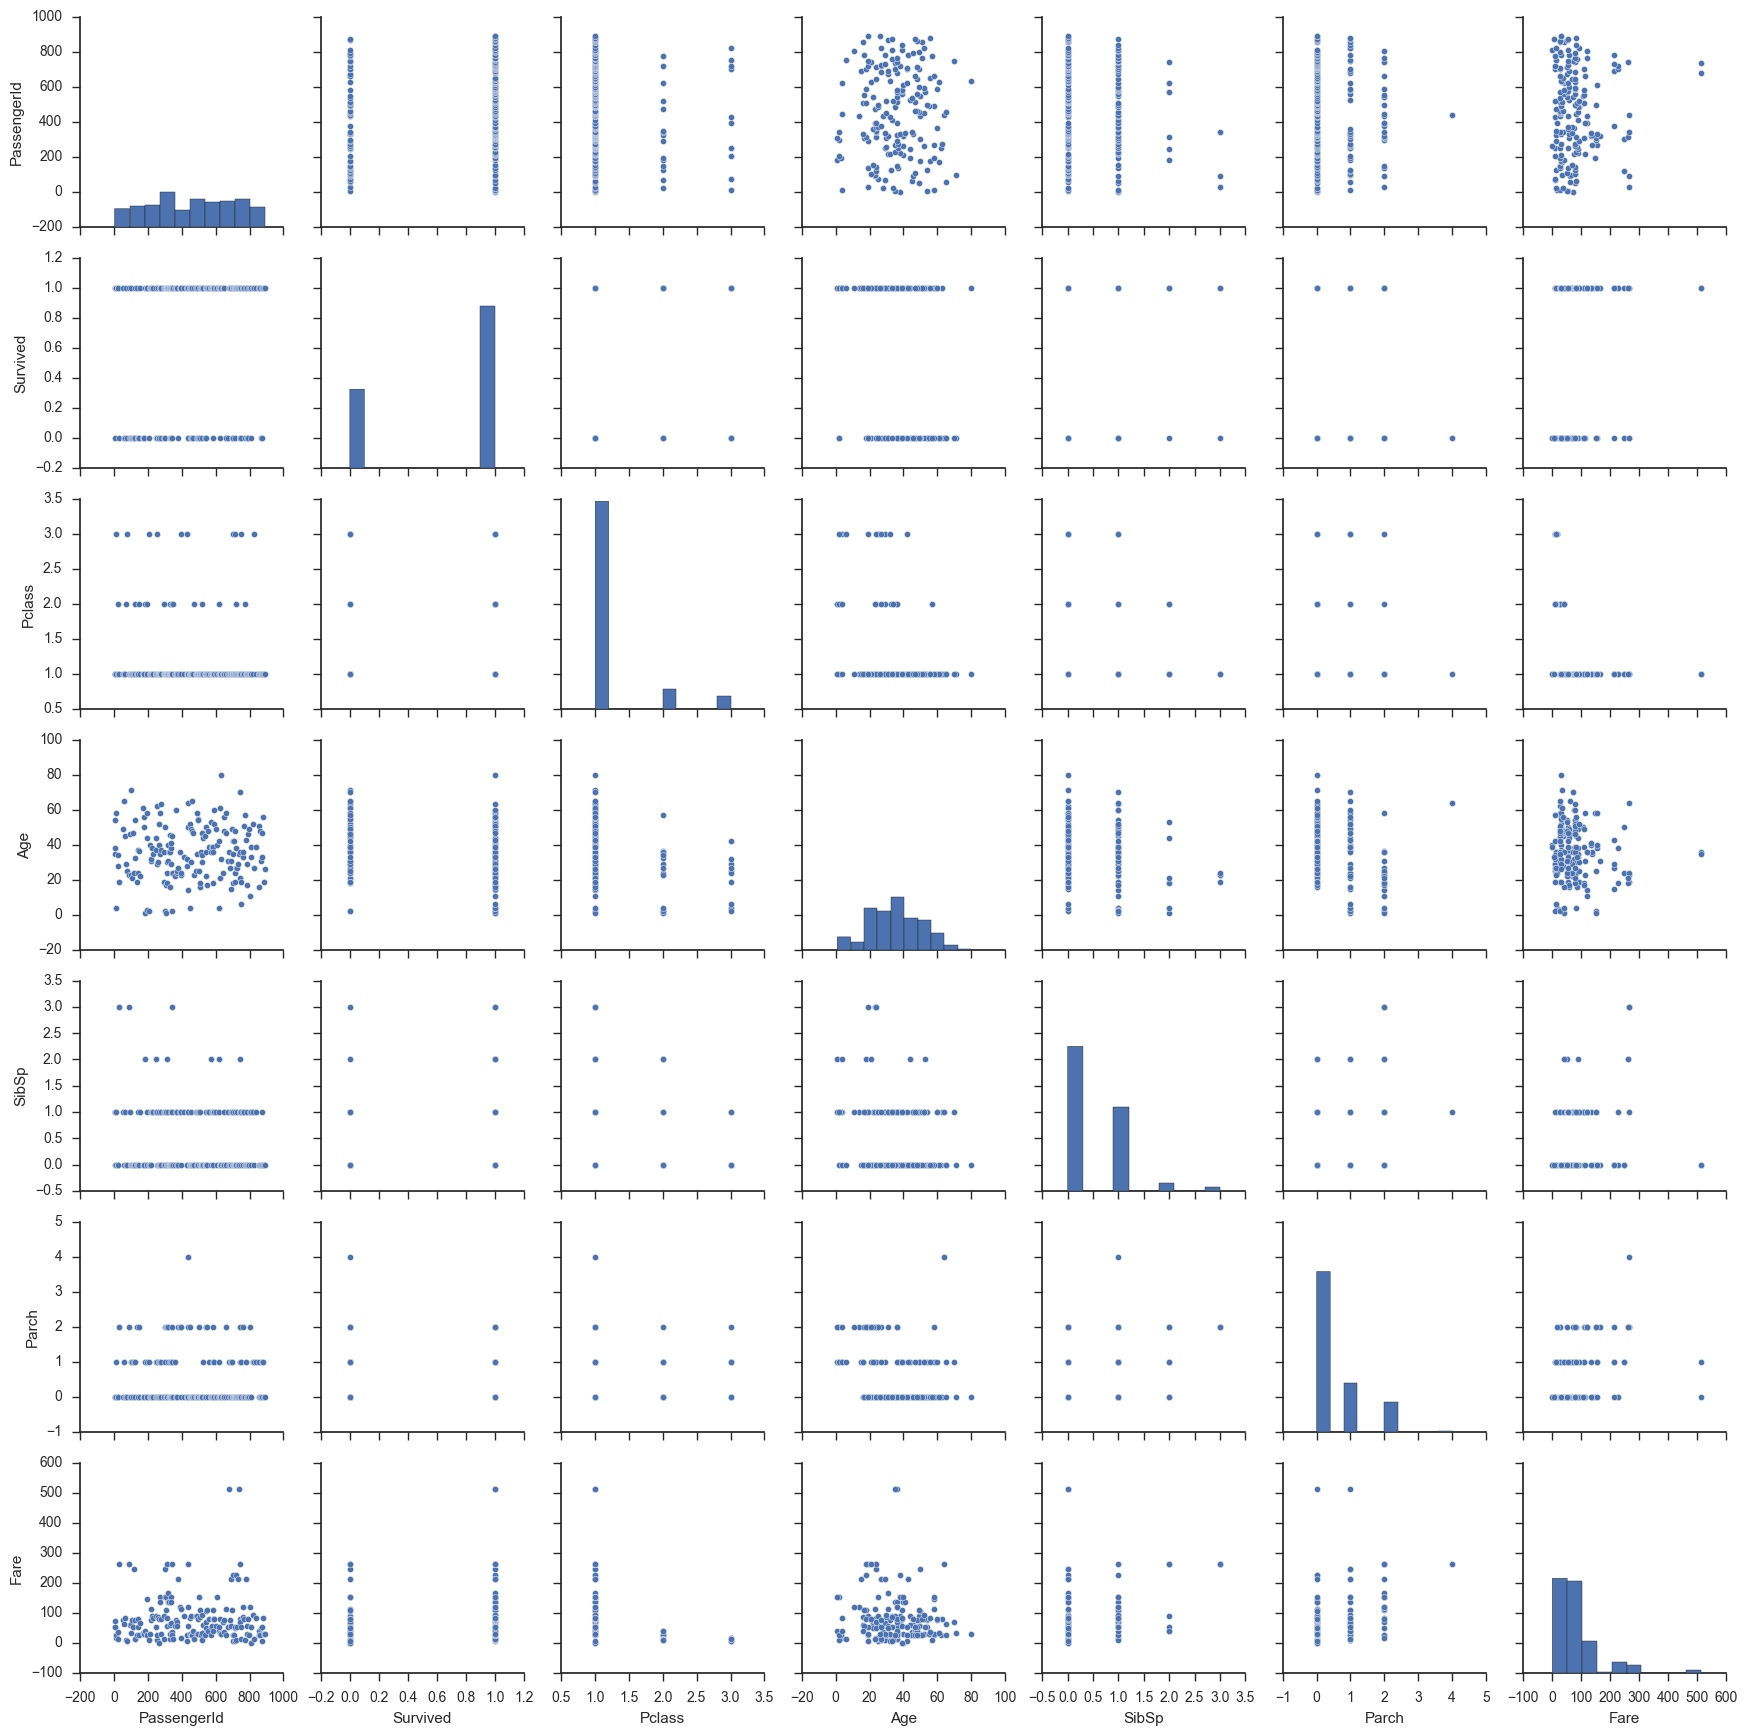

In [8]:
#Visualization of initial understanding of data
sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic.dropna())
sns.plt.show()

In [9]:
#Female and male that survived in general
survived=titanic.groupby('Sex')['Survived']
survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

The number of female survived is significantly higher than male survived. Gender plays a role in survival rate. As suggested in the movie.

Next, I am curious if age plays a factor; if so, old or young?

C:\Users\Pikatsou8\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


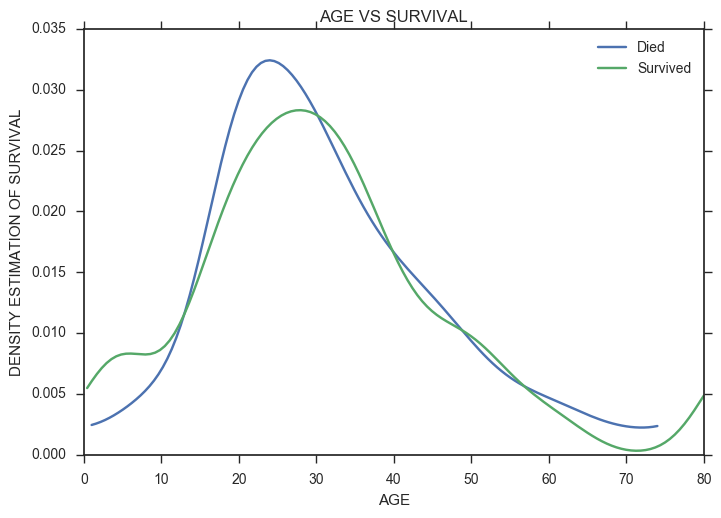

In [11]:
#Age with missing value
sns.kdeplot(titanic.loc[(titanic['Survived']==0),'Age'], label = 'Died',cut=0)
sns.kdeplot(titanic.loc[(titanic['Survived']==1),'Age'], label = 'Survived',cut=0)
plt.xlabel("AGE")
plt.ylabel("DENSITY ESTIMATION OF SURVIVAL")
plt.title("AGE VS SURVIVAL")
plt.show()

The graph and data suggest that the younger the age, the more likely for them to survive.

In [10]:
#Find the correlation between variables

In [11]:
titanic['Fare'].corr(titanic['Survived'])

0.25730652238496232

The correlation above shows that there is a weak link between fare and those who survived.

In [12]:
titanic['SibSp'].corr(titanic['Survived'])

-0.035322498885735583

The correlation above sugguest that even though there is a negative correltion between passenger with siblings and those who survived, the link is very weak.

In [13]:
titanic['Parch'].corr(titanic['Survived'])

0.081629407083483652

The correlation above sugguest that there is a weak correlation between passenger with parents and those who survived.

Now I would like to measure wealth based on class.

In [14]:
Pclass=titanic.groupby(['Pclass'])["Survived"].mean()
Pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

More wealthy people were able to survive than the less wealthy. Now I wonder if there are any confounding variable such that there are more people in 1st class than the rest? and that there are more women than men in first class, since more women survived than men in general.

In [15]:
titanic.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

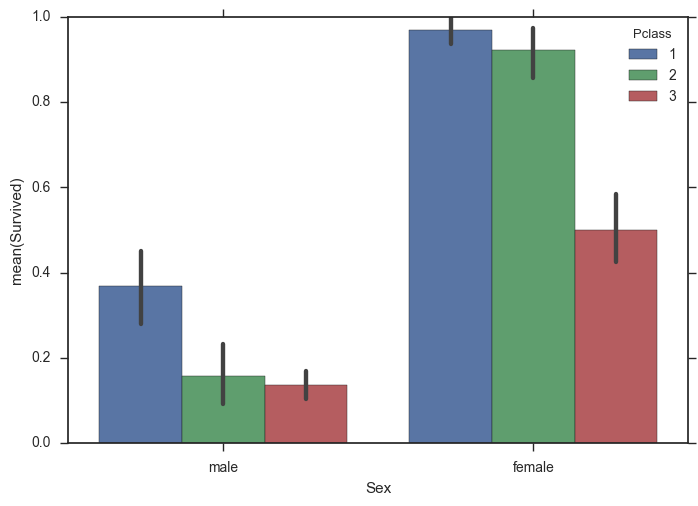

In [16]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic)

The data above shows that more poeple are in 3rd class than the rest. 

In [17]:
hassib=titanic.groupby('SibSp')['Survived'].mean()
hassib

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

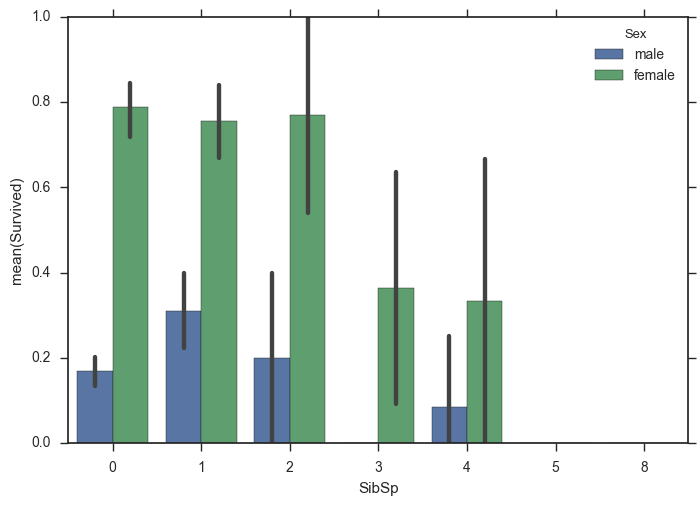

In [18]:
sns.barplot(x="SibSp", y="Survived", hue="Sex", data=titanic)

The data and graph above and below indicate that people with less siblings tend to have a higher survival rate. And out those those, siblings, females have higher survival rate.

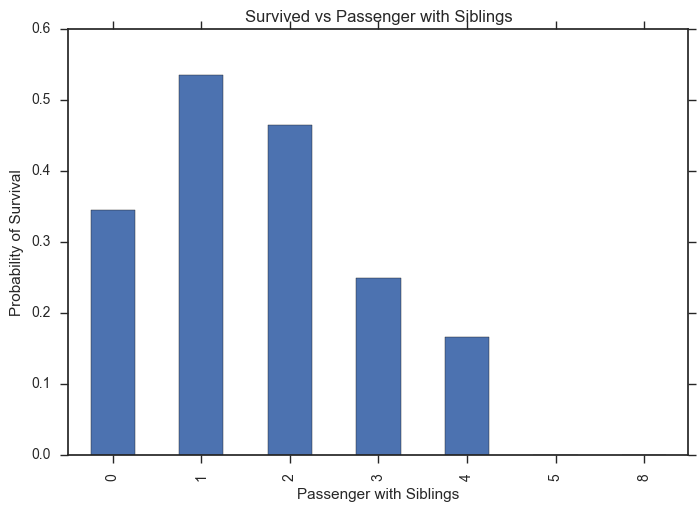

In [19]:
pas_sib=titanic.groupby('SibSp')['Survived'].mean()
pas_sib.plot(kind='bar')
plt.xlabel('Passenger with Siblings')
plt.ylabel('Probability of Survival')
plt.title('Survived vs Passenger with Siblings')
plt.show()

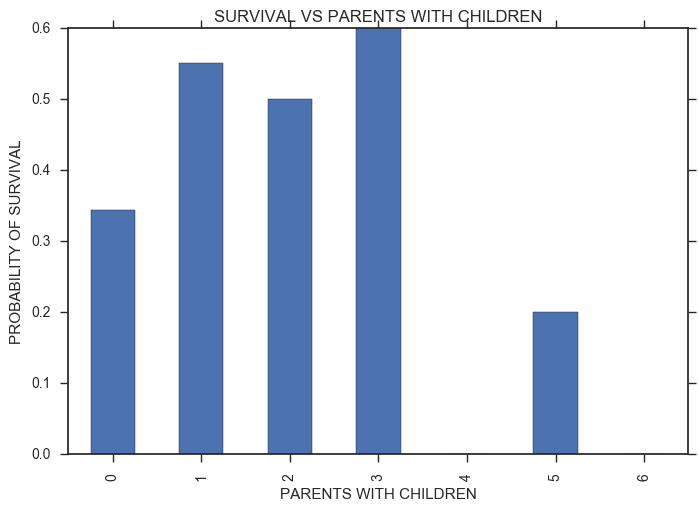

In [20]:
parch=titanic.groupby('Parch')['Survived'].mean()
parch.plot(kind='bar')
plt.xlabel('PARENTS WITH CHILDREN')
plt.ylabel('PROBABILITY OF SURVIVAL')
plt.title('SURVIVAL VS PARENTS WITH CHILDREN')

According to the plot and data analysis above, passengers with parents/children, the less children the parents have, the more likely they are able to survive.

Conclusion: 

The analysis above indiciates that factors such as age and gender plays a role in survival rate. I am quite surprised to see that just because you paid a higher fare, it does not mean you get a better chance in surviving the tragedy, However, if we see wealth in a different perspective; that is, in class, then the higher the class the more likely you are able to survive. Now, we take into confounding factor into the analysis, even the less wealthy is in the majority, less of them sirvied than the wealthy.

It seems that at life and death, wealthy still has access to higher survival rate; on top of this, you have advantage if you are young and female. 

One thing to note is that there is limitation to the dataset. There are missing data, and we do not know for sure that these are all the passengers we have. In addition, it would be really helpful if the data include where were the passengers at on the ship at the time when the ship crashed. This way, we can know if the location of each passenger dramatically increase their survival rate.